In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras.models import Sequential, Model, model_from_json, load_model

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## Load data URL
df = pd.read_csv('/content/drive/My Drive/python/DST5-github/url_data.csv')
df.sample(n=25).head(10) 

,url,isMalicious
27746,epravda.com.ua/news/2017/03/21/622871,0
26991,wuerzburg.de/de/weitere-informationen/presse/b...,0
50087,eiseverywhere.com/event-software/support/custo...,0
60198,nowec.com/splist/1036355_1036524_1037319,0
103114,184.164.107.103/town11.pdf,1
36706,anhuiwangku.com/article1/article_detail.asp?id...,0
55599,quoteinvestigator.com/category/dan-montano,0
67515,ibicn.com/supply/i114101101,0
139937,fortunatogroupservice.com/includes/https:/aten...,1
137234,80port.net/zb/doc/file.index.htm/remax-securel...,1


In [4]:
from string import printable
from keras.preprocessing import sequence

#this block refers online sources
# Step 1: Convert raw URL string in list of lists where characters that are contained in "printable" are stored encoded as integer 
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in df.url]

# Step 2: Cut URL string at max_len or pad with zeros if shorter
max_len=75
X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)
 
# Step 3: Extract labels form df to numpy array
target = np.array(df.isMalicious)

print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (194798, 75) Vector dimension of target:  (194798,)


In [0]:
from sklearn import model_selection

# Simple Cross-Validation: Split the data set into training and test data
X_train, X_test, target_train, target_test = model_selection.train_test_split(X, target, test_size=0.3, random_state=33)

In [0]:
# GENERAL get layer dimensions for any model!
def print_layers_dims(model):
    l_layers = model.layers
    # Note None is ALWAYS batch_size
    for i in range(len(l_layers)):
        print(l_layers[i])
        print('Input Shape: ', l_layers[i].input_shape, 'Output Shape: ', l_layers[i].output_shape)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Embedding,Dropout

max_length=75
embeding_dim=32
lstm_output_size=32


model = Sequential()
model.add(Embedding(100, 32, input_length=max_length))
# Prevent overfitting using dropout method of regularization
model.add(Dropout(0.5))
model.add(LSTM(32, recurrent_dropout=0.5))
model.add(Dropout(0.5))
# Condense to single binary output value
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
# Training set automatically split 8/2 to check validation loss/accuracy at each epoch
history = model.fit(X_train, target_train, validation_split=0.2, epochs=100, batch_size=150,)





Train on 109086 samples, validate on 27272 samples
Epoch 1/100





109086/109086 [==============================] - 87s 794us/step - loss: 0.5134 - acc: 0.7505 - val_loss: 0.4622 - val_acc: 0.7787
Epoch 2/100
109086/109086 [==============================] - 85s 776us/step - loss: 0.4732 - acc: 0.7766 - val_loss: 0.4378 - val_acc: 0.7931
Epoch 3/100
109086/109086 [==============================] - 85s 784us/step - loss: 0.4506 - acc: 0.7917 - val_loss: 0.4109 - val_acc: 0.8113
Epoch 4/100
109086/109086 [==============================] - 85s 778us/step - loss: 0.4327 - acc: 0.8041 - val_loss: 0.3876 - val_acc: 0.8253
Epoch 5/100
109086/109086 [==============================] - 85s 781us/step - loss: 0.4131 - acc: 0.8159 - val_loss: 0.3651 - val_acc: 0.8403
Epoch 6/100
109086/109086 [==============================] - 87s 793us/step - loss: 0.3999 - acc: 0.8242 - val_loss: 0.3527 - val_acc: 0.8476
Epoch 7/100
109086/109086 [==============================] - 87s 798us/step - loss: 0.387

In [9]:
# Evaluation of separate test dataset performed after training
score, acc = model.evaluate(X_test, target_test, verbose=1, batch_size=32)
print(score,acc)

58440/58440 [==============================] - 73s 1ms/step
0.21658712552272646 0.9123887748117727


In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

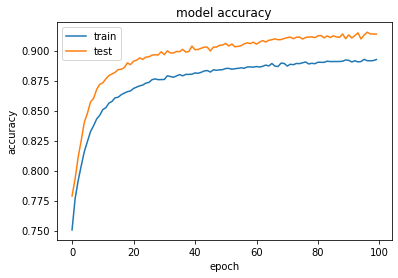

In [11]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the plot of loss, we can see that the model has comparable performance on both train and test datasets. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

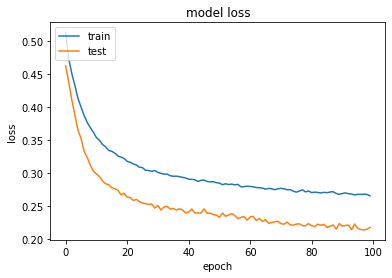

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()